In [160]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import cv2
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10
                                 ) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [161]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# image is an array 

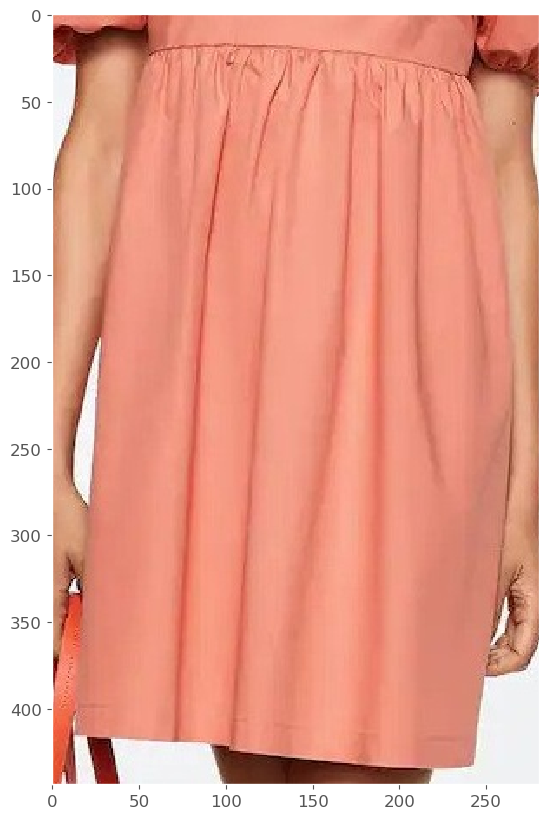

In [162]:
img = get_image(r'static\crop\1.jpeg')
plt.imshow(img)
# plt.axis('off')

In [163]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [164]:
number_of_colors = 5
image = img

In [165]:
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

In [166]:
counts = Counter(labels)
counts = dict(sorted(counts.items()))

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

In [194]:
hex_colors

['#e08671', '#f2f0f0', '#67271a', '#f19a84', '#be6852']

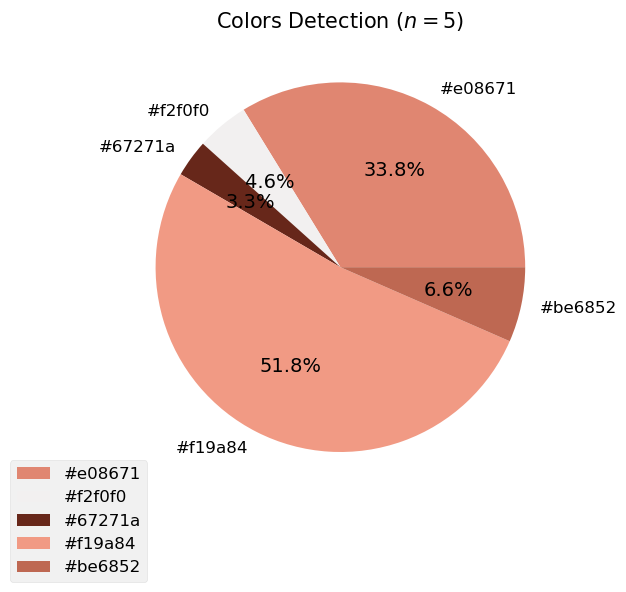

In [167]:
plt.figure(figsize = (8, 6))
plt.title('Colors Detection ($n=5$)', fontsize=15)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors, autopct='%1.1f%%')
# plt.savefig(str(.split('.')[0]) + "_pie_chart.png", bbox_inches='tight')
plt.legend(hex_colors, loc='upper right', bbox_to_anchor=(0.1, 0.1), framealpha=0.5)
# plt.tight_layout()

In [196]:
counts.values()

dict_values([42133, 5717, 4068, 64664, 8182])

In [197]:
counts
# {k: v for k, v in sorted(counts.items(), key=lambda item:item[1])}
# # or 
dict(sorted(counts.items(), key=lambda item: item[1]))

{2: 4068, 1: 5717, 4: 8182, 0: 42133, 3: 64664}

In [225]:
## max color 

# index associated to the most predominate color
ind = list(dict(sorted(counts.items(), key=lambda item: item[1])))
ind
## most predominat color 
hex_colors[ind[-1]]

'#f19a84'

In [199]:
hex_colors

['#e08671', '#f2f0f0', '#67271a', '#f19a84', '#be6852']

In [200]:
center_colors

array([[224.36249496, 134.26041345, 113.15811834],
       [242.96134336, 240.76351233, 240.46492916],
       [103.98650307,  39.52981595,  26.75631902],
       [241.3379035 , 154.48450992, 132.00154746],
       [190.06644761, 104.74358038,  82.59291712]])

In [201]:
counts

{0: 42133, 1: 5717, 2: 4068, 3: 64664, 4: 8182}

In [202]:
hex_colors

['#e08671', '#f2f0f0', '#67271a', '#f19a84', '#be6852']

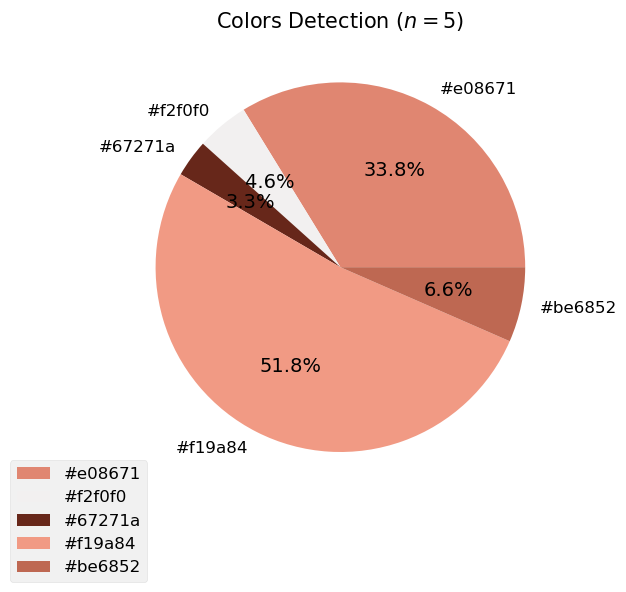

In [203]:

plt.figure(figsize = (8, 6))
plt.title('Colors Detection ($n=5$)', fontsize=15)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors, autopct='%1.1f%%')
# plt.savefig(str(.split('.')[0]) + "_pie_chart.png", bbox_inches='tight')
plt.legend(hex_colors, loc='upper right', bbox_to_anchor=(0.1, 0.1), framealpha=0.5)
# plt.tight_layout()

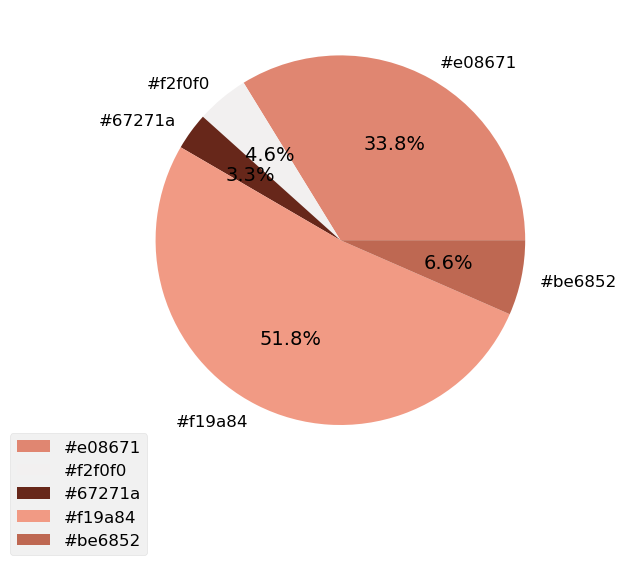

In [204]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


data = pd.DataFrame({'Category': hex_colors})
sizes = data['Category'].value_counts().sort_index() / data['Category'].value_counts().sum()
# plt.pie(sizes, labels=sizes.index,
#         autopct='%1.1f%%', startangle=100)
# plt.axis('equal')
# plt.legend(sizes.index, loc="best")
# plt.tight_layout()
# plt.show()

plt.figure(figsize = (8, 6))

plt.pie(counts.values(), labels = hex_colors, colors = hex_colors, autopct='%1.1f%%')
# plt.savefig(str(.split('.')[0]) + "_pie_chart.png", bbox_inches='tight')
plt.legend(hex_colors, loc='upper right', bbox_to_anchor=(0.1, 0.1), framealpha=0.5)
# plt.tight_layout()

In [205]:
counts

{0: 42133, 1: 5717, 2: 4068, 3: 64664, 4: 8182}

In [206]:
data["Category"]

0    #e08671
1    #f2f0f0
2    #67271a
3    #f19a84
4    #be6852
Name: Category, dtype: object

In [207]:
rgb_colors

[array([224, 134, 113]),
 array([242, 240, 240]),
 array([103,  39,  26]),
 array([241, 154, 132]),
 array([190, 104,  82])]

([<matplotlib.patches.Wedge at 0x25e0a659460>,
 [Text(0.5368754413032937, 0.9600858089386562, '#e08671'),
  Text(-0.7044248307025553, 0.8448583655795073, '#f2f0f0'),
  Text(-0.8892148731527906, 0.647531396430989, '#67271a'),
  Text(-0.49769579627419286, -0.9809683452441252, '#f19a84'),
  Text(1.0767369741933073, -0.225027750299916, '#be6852')])

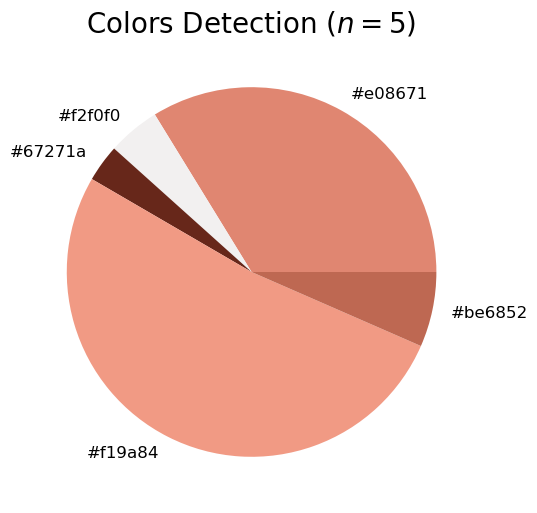

In [208]:
plt.figure(figsize = (8, 6))
plt.title('Colors Detection ($n=5$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

In [209]:
for i in range(len(rgb_colors)):
    rgb_colors[i] = rgb_colors[i].astype(int)

In [210]:
def inthreshold(array):
    count = 0
    for i in range(len(array)):
        if array[i]>=-12 and array[i]<=12:
            count=count+1
    return count

In [211]:
def show_color(col_index):
    color = col_index
    sub_image = (img-rgb_colors[color])
    ZEROS_VALUES = []
    COUNT = []
    for i in range(len(sub_image)):
        for j in range(len(sub_image[i])):
            e = sub_image[i,j]
            #print(e.shape)
            count = inthreshold(e)
            COUNT.append(count)
            if count==2:
                ZEROS_VALUES.append([i,j])
    color_arr=(np.zeros((16,16,3))+rgb_colors[color]).astype(int)
    normalized = sub_image - sub_image.min()
    normalized = ((sub_image/sub_image.max())*255).astype(int)
    ZEROS_IMAGE = img.copy()
    for i in range(len(ZEROS_VALUES)):
        ZEROS_IMAGE[ZEROS_VALUES[i][0],ZEROS_VALUES[i][1],:] = [250,250,250]
    plt.subplot(1,3,1)
    plt.imshow(ZEROS_IMAGE.astype(int))
    plt.subplot(1,3,2)
    plt.imshow(img)
    plt.subplot(1,3,3)
    #pwargs = {'interpolation':'nearest'}
    plt.imshow(color_arr)

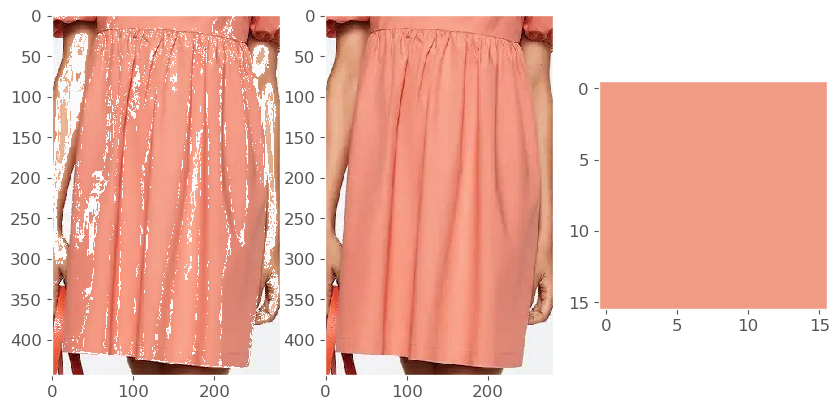

In [227]:
show_color(3)


In [213]:
def square_maker():
    inp_img = img
    h = int(img.shape[0])
    step_h = int(h/10) 
    w = int(img.shape[1])
    step_w = int(w/10) 
    X = np.arange(0,h+step_h,step_h)
    Y =np.arange(0,w+step_w,step_w)
    squares = [inp_img[0:step_h,0:step_w]]
    for i in range(0,len(X)-1):
        for j in range(0,len(Y)-1):
            squares.append(inp_img[X[i]:X[i+1],Y[j]:Y[j+1]])
    return np.array(squares)[1::]

In [214]:
def color_computing(array):
    DIFF = []
    squared_image = square_maker()
    for square in squared_image:
        DIFF_COLOR = []
        for color in range(len(rgb_colors)):
            diff = np.abs(square - rgb_colors[color])
            DIFF_COLOR.append(diff.mean())
        DIFF.append(DIFF_COLOR)
    return np.array(DIFF)

In [215]:
def best_color_plot(selected_slice):
    plt.subplot(1,2,1)
    plt.title('Retrieved Color')
    plt.imshow((np.zeros((16,16,3))+ rgb_colors[color_computing(img)[selected_slice].argmin()]).astype(int))
    plt.subplot(1,2,2)
    plt.title('Selected Square: '+ str(selected_slice))
    plt.imshow(square_maker()[selected_slice])

C:\Users\Cristiana\AppData\Local\Temp\ipykernel_5104\4027662649.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(squares)[1::]


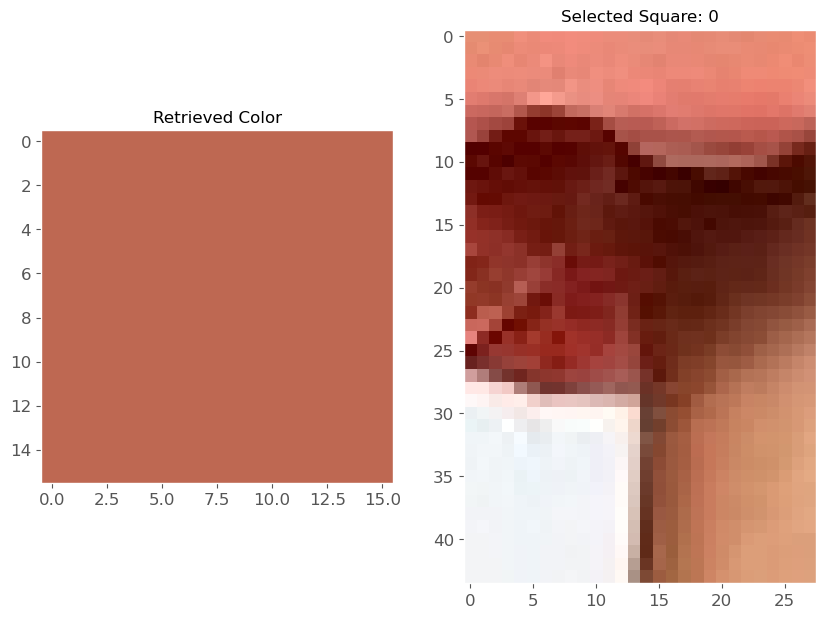

In [216]:
best_color_plot(0)


C:\Users\Cristiana\AppData\Local\Temp\ipykernel_5104\4027662649.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(squares)[1::]


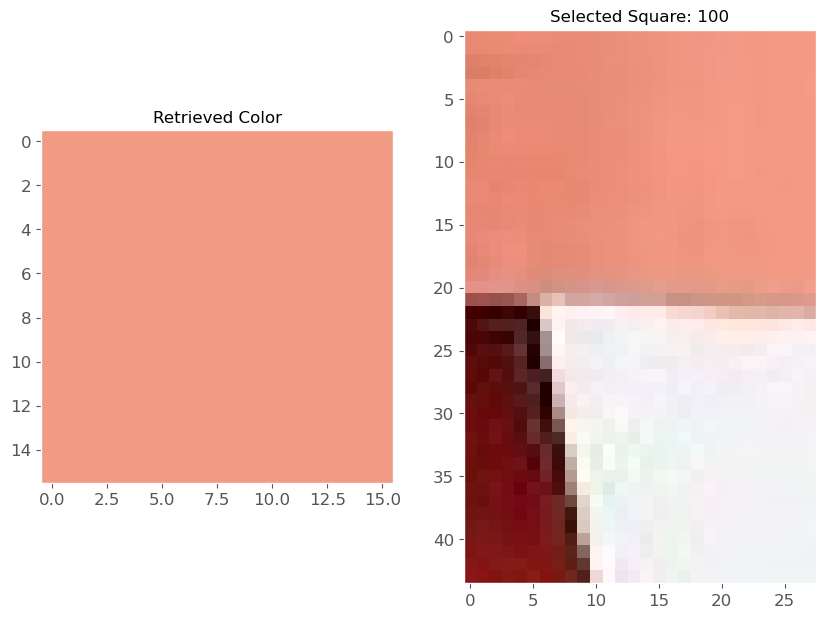

In [217]:
best_color_plot(100)


C:\Users\Cristiana\AppData\Local\Temp\ipykernel_5104\4027662649.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(squares)[1::]


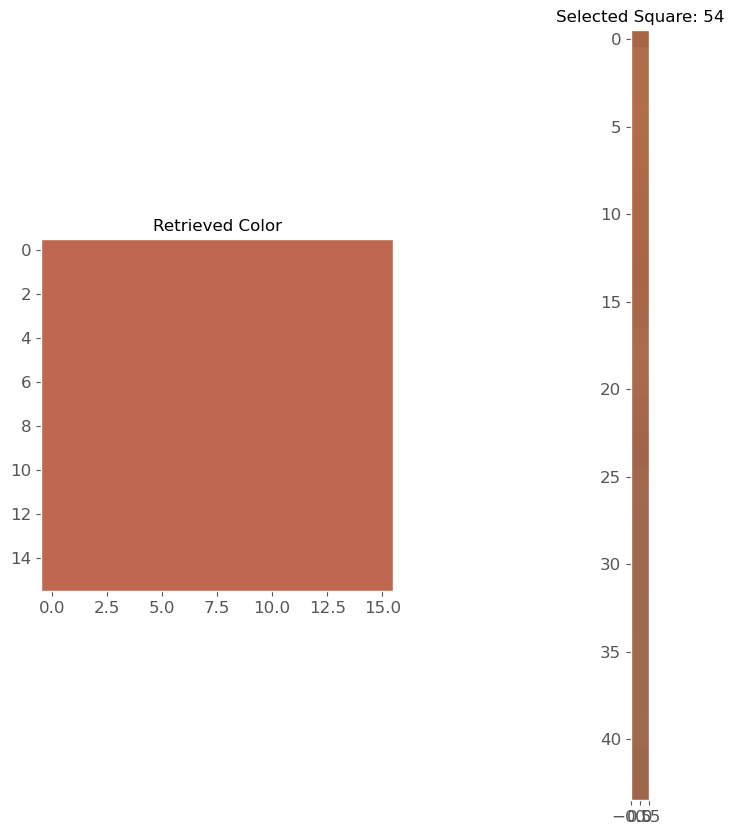

In [218]:
best_color_plot(54)


In [219]:
def build_summary():
    results = color_computing(img)
    cols = ['Square Number'] + hex_colors
    sorted_results = pd.DataFrame(columns= cols)
    k=0

    for r in results:
        d = {'Square Number':int(k)}
        for c in range(len(hex_colors)):
            d[hex_colors[c]] = r[c]*100/r.sum()
        sorted_results = sorted_results.append(d,ignore_index=True)
        k=k+1
    sorted_results['Square Number'] = sorted_results['Square Number'].astype(int)
    return sorted_results

In [220]:
summary_img = build_summary()


C:\Users\Cristiana\AppData\Local\Temp\ipykernel_5104\4027662649.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(squares)[1::]
C:\Users\Cristiana\AppData\Local\Temp\ipykernel_5104\13772947.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sorted_results = sorted_results.append(d,ignore_index=True)
C:\Users\Cristiana\AppData\Local\Temp\ipykernel_5104\13772947.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sorted_results = sorted_results.append(d,ignore_index=True)
C:\Users\Cristiana\AppData\Local\Temp\ipykernel_5104\13772947.py:11: FutureWarning: The frame.append me

In [221]:
summary_img.head()


,Square Number,#e08671,#f2f0f0,#67271a,#f19a84,#be6852
0,0,16.568216,30.105523,19.083864,18.979780,15.262617
1,1,13.578797,35.265311,21.798512,16.665298,12.692083
2,2,6.493063,32.567465,39.650041,7.693361,13.596069
3,3,7.062975,27.158276,44.366735,3.452036,17.959977
4,4,8.192625,25.194131,44.117041,3.763973,18.732230
